# Importing

In [24]:
from random import Random
from time import time
import inspyred
import math
from datetime import datetime
import pandas as pd
import numpy as np
#style graphs
import os
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
import matplotlib.pyplot as plt

# following line is to enable the jupyter black theme:
#from jupyterthemes import jtplot
#jtplot.style( context='notebook',grid=False, ticks =True, fscale =1)
#nice graphsin jupyter:
#%matplotlib notebook  

# importing perfect information methods and variables
import src.perfectga as pe

import src.imperfectga as im


# Symmetric information

In [39]:
# Symmetric Information (Figure 9)

name_1 = 'static_perf_10000_h0.1_cro_1.0_mut_0.2_key_2c843c1'
name_3 = 'static_perf_10000_h0.3_cro_1.0_mut_0.2_key_002d2cb'
name_5 = 'static_perf_10000_fix_cro_1_mut_0.2_key_d6268f5'
name_7 = 'static_perf_10000_h0.7_cro_1.0_mut_0.2_key_7068459'
name_9 = 'static_perf_20000_h0.9_cro_1.0_mut_0.2_key_354e2ab'
name_9 = 'static_perf_40000_h0.9_cro_1.0_mut_0.2_key_c83f510'

db_sims_1 = pd.read_csv('./data/{}.csv'.format(name_1)).set_index('sim')
db_sims_3 = pd.read_csv('./data/{}.csv'.format(name_3)).set_index('sim')
db_sims_5 = pd.read_csv('./data/{}.csv'.format(name_5)).set_index('sim')
db_sims_7 = pd.read_csv('./data/{}.csv'.format(name_7)).set_index('sim')
db_sims_9 = pd.read_csv('./data/{}.csv'.format(name_9)).set_index('sim')

db_sims_1 = db_sims_1[db_sims_1['cutoff']==10000]
db_sims_3 = db_sims_3[db_sims_3['cutoff']==10000]
db_sims_5 = db_sims_5[db_sims_5['cutoff']==10000]
db_sims_7 = db_sims_7[db_sims_7['cutoff']==10000]
db_sims_9 = db_sims_9[db_sims_9['cutoff']==40000]

len(db_sims_9)
db_sims_9.describe()

,vU,vV,vw,va,RiskAverse,init_pop,gen,cutoff
count,7004.000000,7004.000000,7004.000000,7004.000000,7.004000e+03,7004.0,7004.0,7004.0
mean,2.350791,8.426515,0.825644,1.134483,9.000000e-01,50.0,40000.0,40000.0
std,1.008662,1.621686,0.525483,0.808033,8.571534e-14,0.0,0.0,0.0
min,0.007785,0.131056,0.004511,0.002800,9.000000e-01,50.0,40000.0,40000.0
25%,1.593278,7.456035,0.368430,0.519745,9.000000e-01,50.0,40000.0,40000.0
50%,2.449966,8.800216,0.764593,0.936766,9.000000e-01,50.0,40000.0,40000.0
75%,3.224964,9.678806,1.217922,1.594839,9.000000e-01,50.0,40000.0,40000.0
max,3.988768,10.714475,2.151834,5.737869,9.000000e-01,50.0,40000.0,40000.0


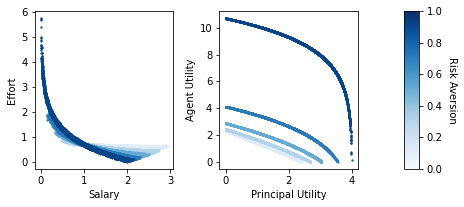

<Figure size 432x288 with 0 Axes>

In [26]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

#colors
blue1 = '#dfebf7'
blue3 = '#b1d2e8'
blue5 = '#65aad4'
blue7 = '#2a7ab9'
blue9 = '#084488'

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(db_sims_1['vw'], db_sims_1['va'], lw=1.4, s=0.8, c= blue1)
ax1.scatter(db_sims_3['vw'], db_sims_3['va'], lw=1.4, s=0.8, c=blue3)
ax1.scatter(db_sims_5['vw'], db_sims_5['va'], lw=1.4, s=0.8, c=blue5)
ax1.scatter(db_sims_7['vw'], db_sims_7['va'], lw=1.4, s=0.8, c= blue7)
ax1.scatter(db_sims_9['vw'], db_sims_9['va'], lw=1.4, s=0.8, c=blue9)
plt.ylabel("Effort",fontsize=10)
plt.xlabel("Salary",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
ax2.scatter(db_sims_1['vU'],db_sims_1['vV'], lw=1.4, s=0.8, c=blue1)
ax2.scatter(db_sims_3['vU'], db_sims_3['vV'], lw=1.4, s=0.8, c= blue3)
ax2.scatter(db_sims_5['vU'], db_sims_5['vV'], lw=1.4, s=0.8, c=blue5)
ax2.scatter(db_sims_7['vU'], db_sims_7['vV'], lw=1.4, s=0.8, c=blue7)
ax2.scatter(db_sims_9['vU'],db_sims_9['vV'], lw=1.4, s=0.8, c=blue9)
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0
               )

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Per_Inf_GA_risk_aversion_1x2.pdf',dpi =100)


# Asymetric Information

## Loading existing database


In [27]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook

name = "simulations_50K"
#name = 'static_perf_10000_fix_cro_1_mut_0.2_key_d6268f5'
#name = 'static_imp_10000_fix_cro_1.0_mut_0.2_key_6c27125'

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name))
except:
    print("Impossible to retrieve {}.cvc".format(name))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok

db_sims.columns = im.cols

db_sims.head()

,sim,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff
0,b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000
1,b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000
2,b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000
3,b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000
4,b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000


In [28]:
#Constructing effort column
def effort(row):
    c = 1-row['risk_averse']
    row['effort'] = np.log( (row['wl']**c +row['wh']**c)/(c))
    return row

db_sims = db_sims.apply(effort, axis=1)

db_sims.head()

,sim,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff,effort
0,b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000,0.760107
1,b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000,0.784144
2,b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000,0.825372
3,b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000,1.357933
4,b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000,1.142670


In [29]:
#Constructing gap salary column
def gap(row):
    row['gap'] = row['wh']-row['wl']
    return row

db_sims_eff_gap = db_sims.apply(gap, axis=1)

db_sims = db_sims_eff_gap

db_sims_eff_gap.head()
db_sims.head()

,sim,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff,effort,gap
0,b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000,0.760107,1.854605
1,b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000,0.784144,1.796529
2,b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000,0.825372,1.986451
3,b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000,1.357933,1.871396
4,b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000,1.142670,1.865996


In [30]:
U_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['princ']
V_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['agent']
WL_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['wl']
WH_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['wh']
effort_90 = db_sims[(db_sims['risk_averse']==0.9)]['effort']
gap_90 = db_sims[(db_sims['risk_averse']==0.9)]['gap']

U_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['princ']
V_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['agent']
WL_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['wl']
WH_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['wh']
effort_70 = db_sims[(db_sims['risk_averse']==0.7)]['effort']
gap_70 = db_sims[(db_sims['risk_averse']==0.7)]['gap']

U_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['princ']
V_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['agent']
WL_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['wl']
WH_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['wh']
effort_50 = db_sims[(db_sims['risk_averse']==0.5)]['effort']
gap_50 = db_sims[(db_sims['risk_averse']==0.5)]['gap']

U_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['princ']
V_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['agent']
WL_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['wl']
WH_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['wh']
effort_30 = db_sims[(db_sims['risk_averse']==0.3)]['effort']
gap_30 = db_sims[(db_sims['risk_averse']==0.3)]['gap']

U_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['princ']
V_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['agent']
WL_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['wl']
WH_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['wh']
effort_10 = db_sims[(db_sims['risk_averse']==0.1)]['effort']
gap_10 = db_sims[(db_sims['risk_averse']==0.1)]['gap']

# Ploting


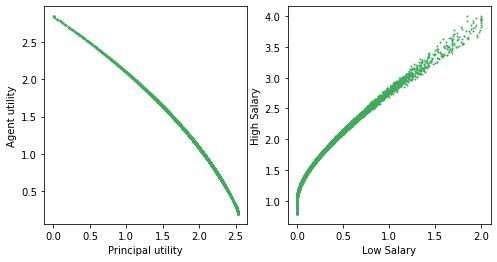

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(U_ga50, V_ga50, color ='#41ab5d', s=1.0, alpha=1)
plt.ylabel("Agent utility", fontsize=10)
plt.xlabel("Principal utility", fontsize=10)
plt.subplot(122)
plt.scatter(WL_ga50, WH_ga50, color ='#41ab5d', s=1.0, alpha=1)
plt.xlabel("Low Salary",fontsize=10)
plt.ylabel("High Salary",fontsize=10)
plt.show()



plt.savefig('./reports/GA_Imperf_Inf.pdf',dpi =60)

plt.show()

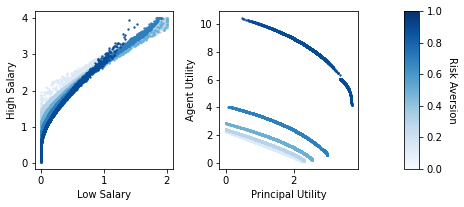

In [32]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(WL_ga10, WH_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(WL_ga30, WH_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(WL_ga50, WH_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(WL_ga70, WH_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(WL_ga90, WH_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Low Salary",fontsize=10)
plt.ylabel("High Salary",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
ax2.scatter(U_ga10, V_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax2.scatter(U_ga30, V_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax2.scatter(U_ga50, V_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax2.scatter(U_ga70, V_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax2.scatter(U_ga90, V_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_1x2.pdf')

plt.show()


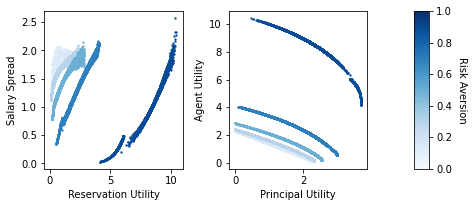

In [95]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(V_ga10, gap_10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(V_ga30, gap_30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(V_ga50, gap_50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(V_ga70, gap_70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(V_ga90, gap_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Reservation Utility",fontsize=10)
plt.ylabel("Salary Spread",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
ax2.scatter(U_ga10, V_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax2.scatter(U_ga30, V_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax2.scatter(U_ga50, V_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax2.scatter(U_ga70, V_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax2.scatter(U_ga90, V_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                cmap=cmap_blue,
                                norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_salary_spread_1x2_corrected.pdf')

plt.show()


In [34]:
!ls

AP-ga-simulations (1).ipynb ga-ploting.ipynb
AP-ga-simulations.ipynb     reports
data                        sims-standard-mo (1).ipynb
ga-ploting (1).ipynb        sims-standard-mo.ipynb
ga-ploting 2.ipynb          src


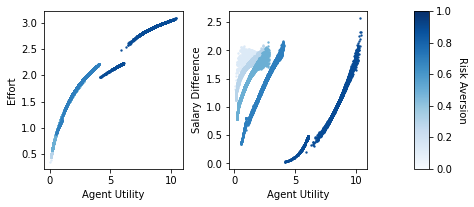

In [35]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(V_ga10, effort_10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(V_ga30, effort_30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(V_ga50, effort_50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(V_ga70, effort_70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(V_ga90, effort_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Effort",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
#ax1 = fig.add_subplot()
ax2.scatter(V_ga10, gap_10, lw=1.4, s=0.9, c='#DCEAF7')
ax2.scatter(V_ga30, gap_30, lw=1.4, s=0.9, c='#B8D4EA')
ax2.scatter(V_ga50, gap_50, lw=1.4, s=0.9, c='#6BAFD4')
ax2.scatter(V_ga70, gap_70, lw=1.4, s=0.9, c='#2E7FBE')
ax2.scatter(V_ga90, gap_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Salary Difference",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_effort_gap_1x2.pdf')

plt.show()



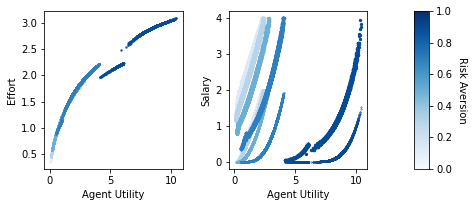

<Figure size 432x288 with 0 Axes>

In [36]:
#markers' list, not found in code, redefined 29.9.2020
marks =["o","h","v","<",">"]
marks =[".",".",".","."]

fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(V_ga10, effort_10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(V_ga30, effort_30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(V_ga50, effort_50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(V_ga70, effort_70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(V_ga90, effort_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Effort",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
#ax1 = fig.add_subplot()
ax2.scatter(V_ga10, WL_ga10, lw=1.4, s=0.9, c='#DCEAF7', marker=marks[1])
ax2.scatter(V_ga10, WH_ga10, lw=1.4, s=15.0, c='#DCEAF7', marker=marks[3])
ax2.scatter(V_ga30, WL_ga30, lw=1.4, s=0.9, c='#B8D4EA', marker=marks[1])
ax2.scatter(V_ga30, WH_ga30, lw=1.4, s=15.0, c='#B8D4EA', marker=marks[3])
ax2.scatter(V_ga50, WL_ga50, lw=1.4, s=0.9, c='#6BAFD4', marker=marks[1])
ax2.scatter(V_ga50, WH_ga50, lw=1.4, s=15.0, c='#6BAFD4', marker=marks[3])
ax2.scatter(V_ga70, WL_ga70, lw=1.4, s=0.9, c='#2E7FBE', marker=marks[1])
ax2.scatter(V_ga70, WH_ga70, lw=1.4, s=15.0, c='#2E7FBE', marker=marks[3])
ax2.scatter(V_ga90, WL_ga90, lw=1.4, s=0.9, c='#074B96', marker=marks[1])
ax2.scatter(V_ga90, WH_ga90, lw=1.4, s=15.0, c='#074B96', marker=marks[3])
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Salary",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_effort_1x2.pdf')

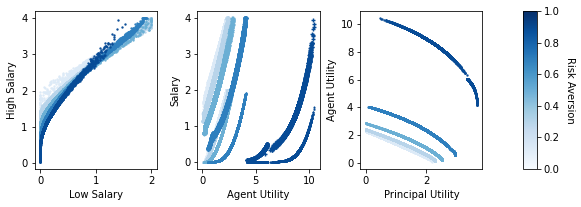

<Figure size 432x288 with 0 Axes>

In [37]:
fig= plt.figure(figsize=(9, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 10, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues
marks = [">", '^', (5,0), '+', (5,2)]#, (5,1)]

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(WL_ga10, WH_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(WL_ga30, WH_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(WL_ga50, WH_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(WL_ga70, WH_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(WL_ga90, WH_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Low Salary",fontsize=10)
plt.ylabel("High Salary",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
#ax1 = fig.add_subplot()
ax2.scatter(V_ga10, WL_ga10, lw=1.4, s=0.9, c='#DCEAF7', marker=marks[1])
ax2.scatter(V_ga10, WH_ga10, lw=1.4, s=15.0, c='#DCEAF7', marker=marks[3])
ax2.scatter(V_ga30, WL_ga30, lw=1.4, s=0.9, c='#B8D4EA', marker=marks[1])
ax2.scatter(V_ga30, WH_ga30, lw=1.4, s=15.0, c='#B8D4EA', marker=marks[3])
ax2.scatter(V_ga50, WL_ga50, lw=1.4, s=0.9, c='#6BAFD4', marker=marks[1])
ax2.scatter(V_ga50, WH_ga50, lw=1.4, s=15.0, c='#6BAFD4', marker=marks[3])
ax2.scatter(V_ga70, WL_ga70, lw=1.4, s=0.9, c='#2E7FBE', marker=marks[1])
ax2.scatter(V_ga70, WH_ga70, lw=1.4, s=15.0, c='#2E7FBE', marker=marks[3])
ax2.scatter(V_ga90, WL_ga90, lw=1.4, s=0.9, c='#074B96', marker=marks[1])
ax2.scatter(V_ga90, WH_ga90, lw=1.4, s=15.0, c='#074B96', marker=marks[3])
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Salary",fontsize=10)

ax3 = fig.add_subplot(gs[:, 6:9])
ax3.scatter(U_ga10, V_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax3.scatter(U_ga30, V_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax3.scatter(U_ga50, V_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax3.scatter(U_ga70, V_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax3.scatter(U_ga90, V_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)


ax4 = fig.add_subplot(gs[:,9:10])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax4, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_1x3.pdf')

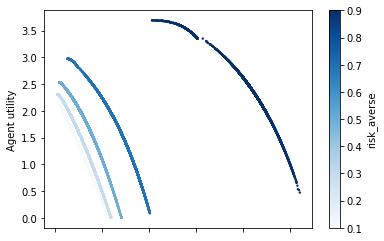

<Figure size 432x288 with 0 Axes>

In [15]:
db_sims.plot.scatter(x = 'agent', y = 'princ',
                     c = 'risk_averse',
                     #colormap='Binary',
                     #colormap = 'Wistia',
                     colormap ='Blues',
                     #colormap = 'Greys',
                     #colormap='viridis',
                     lw = 1.4, s = 1.0, alpha = 1)
plt.ylabel("Agent utility", fontsize=10)
plt.xlabel("Principal utility", fontsize=10)
#Adding color barcbar = plt.colorbar()

plt.show()

plt.savefig('./reports/Pareto_Front_asymmetric.pdf')


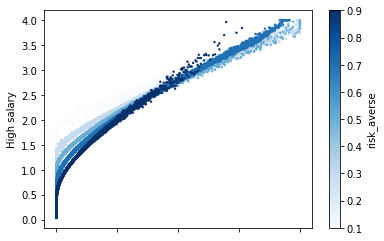

In [18]:
db_sims.plot.scatter(x='wl',y='wh',
                     c='risk_averse',
                     #colormap='viridis',
                     #colormap='Binary',
                     colormap ='Blues',
                     #colormap='Greys',
                     lw=1.4,s=1.0,alpha=1)
plt.xlabel("Low salary")
plt.ylabel("High salary")


plt.savefig('./reports/Salary_asymmetric.pdf')


## General Asymmetric information 

These figures were remade for the third revision (Figures 10, 11) (august 2022)

The parameters need it were crossover 1.0, mutation 0.2, initial population 50, generations 100000. 

In [43]:
 #Creating a database and loading from disc,
# run this cell each time you reopen the jupyter notebook

name = "static_imp_10000_fix_cro_1.0_mut_0.2_key_74370e9"

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name))

#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_pi.rename(columns= {'Unnamed: 0':'index','cara':'risk_aversion_coefficient'},
#                  inplace=True)
#db_sims_pi.set_index('sim',inplace= True)
db_sims.columns = im.cols[1:]
#printing head of dataframe,checkingif everything is ok
db_sims.head()

,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff
sim,,,,,,,,
74370e9b-cc49-42bb-b491-b4a7798eaa83,2.000000,0.788706,0.000000,2.000000,0.5,11,10000,0
74370e9b-cc49-42bb-b491-b4a7798eaa83,1.976393,1.101706,0.200000,1.800000,0.5,11,10000,0
74370e9b-cc49-42bb-b491-b4a7798eaa83,1.767544,1.294820,0.400000,1.600000,0.5,11,10000,0
74370e9b-cc49-42bb-b491-b4a7798eaa83,1.912490,1.188437,0.276274,1.782574,0.5,11,10000,300
74370e9b-cc49-42bb-b491-b4a7798eaa83,0.238533,2.647457,1.660643,4.000000,0.5,11,10000,300


cutoffs:   [    0   300   800  1500  2500  4500  6500  8500 10000]


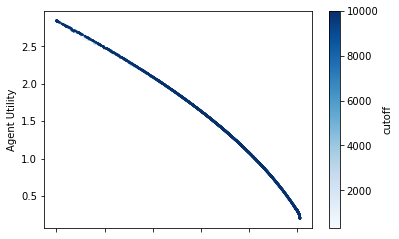

In [44]:
print("cutoffs:  ",db_sims['cutoff'].unique())

df = db_sims[(db_sims['risk_averse']==0.5) & ~(db_sims['cutoff']==0)]
fig = df.plot.scatter(x = 'princ', y = 'agent',
                c = 'cutoff',
                colormap ='Blues',
                lw = 1.4,
                s = 1.0,
                alpha = 1)
plt.ylabel("Agent Utility", fontsize=10)
plt.xlabel("Principal Utility", fontsize=10);
#plt.xlim(0,4)
#plt.ylim(0,11)


#plt.savefig('./reports/Pareto_Front_500.pdf')


In [72]:
#Data from Genetic Algorithm Simulation
final_cutoff = max(db_sims['cutoff'])
# testing with a smaller cutoff
#final_cutoff = 1500

# ordering by reservation utility or agent utility
db_sims = db_sims.sort_values(by=['agent'], ascending = True)

U_ga = db_sims[(db_sims['risk_averse']==0.5) & (db_sims['cutoff']==final_cutoff)]['princ']
V_ga = db_sims[(db_sims['risk_averse']==0.5) & (db_sims['cutoff']==final_cutoff)]['agent']
wl_ga = db_sims[(db_sims['risk_averse']==0.5) & (db_sims['cutoff']==final_cutoff)]['wl']
wh_ga = db_sims[(db_sims['risk_averse']==0.5) & (db_sims['cutoff']==final_cutoff)]['wh']

# getting effort levels, uses function defined above
db_sims = db_sims.apply(effort, axis=1)
effort_ga = db_sims[(db_sims['risk_averse']==0.5) & (db_sims['cutoff']==final_cutoff)]['effort']


# getting salary spread
db_sims = db_sims.apply(gap, axis=1)
gap_ga = db_sims[(db_sims['risk_averse']==0.5) & (db_sims['cutoff']==final_cutoff)]['gap']

db_sims.describe()




,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff,effort,gap
count,8712.000000,8712.000000,8712.000000,8712.000000,8712.0,8712.0,8712.0,8712.000000,8712.000000,8712.000000
mean,1.779474,1.247687,0.436819,1.908449,0.5,11.0,10000.0,6409.859963,1.282164,1.471631
std,0.584540,0.648530,0.451110,0.713852,0.0,0.0,0.0,3141.983603,0.349456,0.297163
min,0.000000,0.199923,0.000000,0.785061,0.5,11.0,10000.0,0.000000,0.572150,0.785061
25%,1.482775,0.753897,0.072976,1.374014,0.5,11.0,10000.0,4500.000000,1.058846,1.290368
50%,1.827221,1.287915,0.336751,1.888349,0.5,11.0,10000.0,6500.000000,1.363378,1.548934
75%,2.238866,1.652538,0.618230,2.296523,0.5,11.0,10000.0,8500.000000,1.526303,1.666131
max,2.529336,2.841653,2.000000,4.000000,0.5,11.0,10000.0,10000.000000,1.921094,2.426681


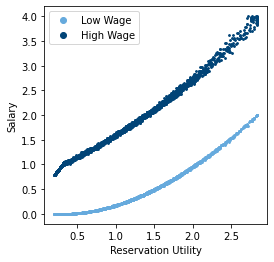

In [89]:
# Ploting figure 10 

from cProfile import label


plt.figure(figsize=(4, 4))

#plt.scatter(V_ga, wl_ga, color ='#66aadd', label = "Low Wage", s=1.0, alpha=1)
#plt.scatter(V_ga, wh_ga, color ='#014477',label = "High Wage", s=1.0, alpha=1)
plt.plot(V_ga, wl_ga, 'o', color ='#66aadd', label = "Low Wage",   markersize=1.8) # plots allows changing marker size in legend
plt.plot(V_ga, wh_ga, 'o', color ='#014477', label = "High Wage",  markersize=1.8)
plt.ylabel("Salary",fontsize=10)
plt.xlabel("Reservation Utility",fontsize=10)
lgnd = plt.legend()
lgnd.legendHandles[0]._legmarker.set_markersize(6)
lgnd.legendHandles[1]._legmarker.set_markersize(6)

plt.savefig('./reports/Imp_Inf_GA_h50_wage_agent_corrected.pdf')

plt.show()

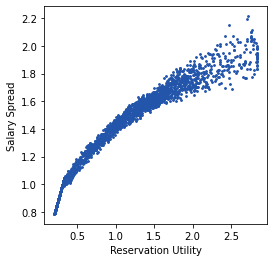

In [90]:
# Ploting figure 10 

plt.figure(figsize=(4, 4))

#plt.scatter(V_ga, wl_ga, color ='#66aadd', label = "Low Wage", s=1.0, alpha=1)
#plt.scatter(V_ga, wh_ga, color ='#014477',label = "High Wage", s=1.0, alpha=1)
plt.plot(V_ga, gap_ga, 'o', color ='#2355aa',  markersize=1.8) # plots allows changing marker size in legend
plt.ylabel("Salary Spread",fontsize=10)
plt.xlabel("Reservation Utility",fontsize=10)

plt.savefig('./reports/Imp_Inf_GA_SalarySpread_H_05_corrected.pdf')

plt.show()

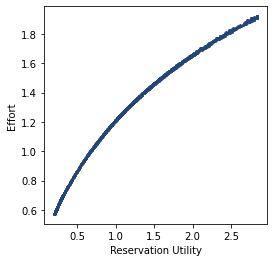

In [91]:
# Ploting figure 11

plt.figure(figsize=(4, 4))

#plt.scatter(V_ga, wl_ga, color ='#66aadd', label = "Low Wage", s=1.0, alpha=1)
#plt.scatter(V_ga, wh_ga, color ='#014477',label = "High Wage", s=1.0, alpha=1)
plt.plot( V_ga, effort_ga,'o', color ='#23457a',  markersize=1.8) # plots allows changing marker size in legend
plt.ylabel("Effort",fontsize=10)
plt.xlabel("Reservation Utility",fontsize=10)


plt.savefig('./reports/Imp_Inf_GA_h50_effort_agent_corrected.pdf')

plt.show()

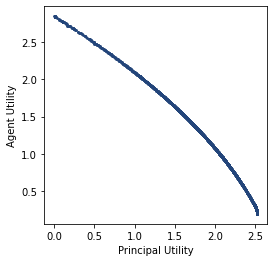

In [93]:
# Ploting figure 11

plt.figure(figsize=(4, 4))

#plt.scatter(V_ga, wl_ga, color ='#66aadd', label = "Low Wage", s=1.0, alpha=1)
#plt.scatter(V_ga, wh_ga, color ='#014477',label = "High Wage", s=1.0, alpha=1)
plt.plot( U_ga, V_ga, 'o', color ='#23457a',  markersize=1.8) # plots allows changing marker size in legend
plt.xlabel("Principal Utility",fontsize = 10)
plt.ylabel("Agent Utility",fontsize = 10)


plt.savefig('./reports/Imp_Inf_GA_frontier_corrected_v1.pdf')

plt.show()


# Ploting with comparison

In [19]:
#Data from Genetic Algorithm Simulation Perfect# 

#Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook
# If there's no database with that name, it will create a new dataframe. 
# After the first simulation will be store. 
name = "simulations_Enero_Prueba_80k"

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name))
    print("Creating new database named {}.cvc".format(name))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok
db_sims.head()

,vU,vV,WL,WH,RiskAverse,init_pop,gens,cutoff
sim,,,,,,,,
11e6cd2f-dab1-4133-ad06-afcd0342c428,1.143874,1.960806,0.875074,2.817135,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,1.503191,1.303344,0.083237,2.735731,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,0.904654,2.131348,0.996615,3.256526,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,2.050364,0.972343,0.104834,1.799764,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,1.191454,1.915589,0.821870,2.783089,0.5,10,80000,0


In [20]:
#Data from Genetic Algorithm Simulation
U_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['vU']
V_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['vV']
WL_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['WL']
WH_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['WH']

In [21]:
#Data from Genetic Algorithm Simulation ImPerfect# 

#Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook
# If there's no database with that name, it will create a new dataframe. 
# After the first simulation will be store.
name = "simulations_50K"

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name))
    print("Creating new database named {}.cvc".format(name))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok
db_sims.head()

,u_p,u_a,w_l,w_h,risk_aversion_coefficient,beta,init_pop,gens
sim,,,,,,,,
b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000


In [22]:
U_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['u_p']
V_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['u_a']
WL_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['w_l']
WH_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['w_h']

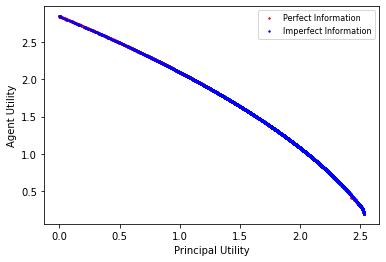

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(6, 4))

plt.scatter(U_ga11, V_ga11, s=2.0, c='red', label='Perfect Information')
plt.scatter(U_ga50, V_ga50, s=2.0, c='blue', label='Imperfect Information')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)
plt.legend(fontsize=8) 

plt.show()
plt.savefig('./reports/Third_Comparation.pdf')